In [3]:
import requests
import pandas as pd


In [4]:
# URL de la API que quieres consultar
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [5]:
response = requests.get(url)


In [6]:
if response.status_code == 200:
  datos = response.json()  # Esto será un dict o una lista
  print("Datos recibidos")

Datos recibidos


In [7]:
df = pd.DataFrame(datos)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [8]:
print(df.info())  # Muestra nombres de columnas, cantidad de datos no nulos, y tipos de datos
print(df.head())  # Muestra las primeras filas del dataset para tener una idea general
print(df.dtypes) # Muestra los tipos de datos del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 

In [9]:
print(df.isnull().sum()) # Recuento de valores nulos por columna

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
#Normalizacion de datos para analisis
datos = pd.json_normalize(df["account"])
datos.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [12]:
#Normalizacion de datos para analisis
categorias = pd.json_normalize(df["customer"])
categorias.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [13]:
import numpy as np

In [14]:
col_montos = ["Charges.Monthly", "Charges.Total"]

In [15]:
#Cambio de tipo de datos para columnas de montos
datos[col_montos] = datos[col_montos].replace(' ', np.nan).astype(np.float64)

In [16]:
print(datos[col_montos].head())

   Charges.Monthly  Charges.Total
0             65.6         593.30
1             59.9         542.40
2             73.9         280.85
3             98.0        1237.85
4             83.9         267.40


In [17]:
#Columna monto diario
datos['Charges.Dayly'] = datos['Charges.Monthly'] / 30

In [18]:
print(datos[['Charges.Dayly', 'Charges.Monthly']].head())

   Charges.Dayly  Charges.Monthly
0       2.186667             65.6
1       1.996667             59.9
2       2.463333             73.9
3       3.266667             98.0
4       2.796667             83.9


In [19]:
# Media
media = datos['Charges.Dayly'].mean()
# Mediana
mediana = datos['Charges.Dayly'].median()
# Desviación estándar
desviacion = datos['Charges.Dayly'].std()

In [20]:
print(datos['Charges.Dayly'].describe())

count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Charges.Dayly, dtype: float64


In [31]:
combined_df.to_csv("datos_combinados.csv", index=False)

In [21]:
import matplotlib.pyplot as plt

In [22]:
# Conteo de clientes por categoría en 'churn'
churn_counts = df['churn'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

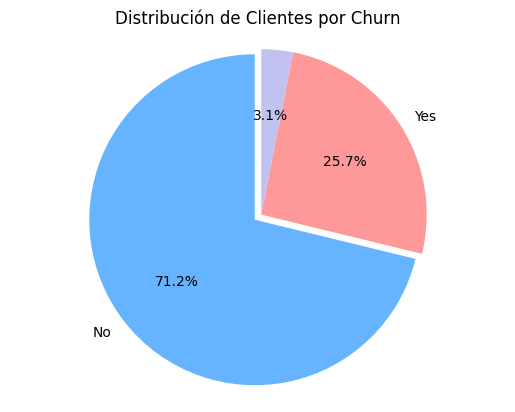

In [23]:
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',  # Mostrar porcentaje con 1 decimal
    startangle=90,      # Para rotar el inicio del gráfico
    colors=['#66b3ff', '#ff9999', '#c2c2f0'],  # Added a third color
    explode=(0.05, 0, 0)   # Added a third value to match the number of categories
)

plt.title('Distribución de Clientes por Churn')
plt.axis('equal')  # Hace que el círculo sea perfecto
plt.show()

In [27]:
# Calculate the sum of 'Charges.Total' for each churn category
Contract_total_charges = combined_df.groupby('Contract')['Charges.Total'].sum()
print(Contract_total_charges)
# Create a bar plot
plt.figure(figsize=(8, 6))
Contract_total_charges.plot(kind='bar', color=['#66b3ff', '#ff9999', '#c2c2f0'])

# Add titles and labels
plt.title('Total Charges by Contract')
plt.xlabel('Contract')
plt.ylabel('Total Charges')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'combined_df' is not defined

In [ ]:
# Calculate the sum of 'Charges.Total' for each Contract category
churn_total_charges = combined_df.groupby('churn')['Charges.Total'].sum()
print(churn_total_charges)
# Create a bar plot
plt.figure(figsize=(8, 6))
churn_total_charges.plot(kind='bar', color=['#66b3ff', '#ff9999', '#c2c2f0'])

# Add titles and labels
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# grafico de barras x genero
genero_churn = combined_df.groupby(['PaymentMethod', 'churn']).size().unstack(fill_value=0)

# 2. Crear gráfico de barras
genero_churn.plot(kind='bar', figsize=(8, 6), color=['#66b3ff', '#ff9999', '#c2c2f0'])

# 3. Estética del gráfico
plt.title('Cantidad de clientes por Metodo de Pago y estado de churn')
plt.xlabel('MetodoPago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# 4. Mostrar gráfico
plt.show()

In [ ]:
# grafico de barras x genero
genero_churn = combined_df.groupby(['gender', 'churn']).size().unstack(fill_value=0)

# 2. Crear gráfico de barras
genero_churn.plot(kind='bar', figsize=(8, 6), color=['#66b3ff', '#ff9999', '#c2c2f0'])

# 3. Estética del gráfico
plt.title('Cantidad de clientes por Genero y estado de churn')
plt.xlabel('Genero')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# 4. Mostrar gráfico
plt.show()

In [ ]:
# grafico de barras x genero
genero_churn = combined_df.groupby(['Contract', 'churn']).size().unstack(fill_value=0)

# 2. Crear gráfico de barras
genero_churn.plot(kind='bar', figsize=(8, 6), color=['#66b3ff', '#ff9999', '#c2c2f0'])

# 3. Estética del gráfico
plt.title('Cantidad de clientes por Tipo Contrato y estado de churn')
plt.xlabel('TContrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# 4. Mostrar gráfico
plt.show()

In [29]:
# Paso 1: Verifica que 'churn' esté en el DataFrame original
if 'churn' in df.columns:
    churn = df['churn'].reset_index(drop=True)
else:
    raise ValueError("La columna 'churn' no existe en df")

# Paso 2: Asegura que todos los DataFrames tengan el mismo índice
datos = datos.reset_index(drop=True)
categorias = categorias.reset_index(drop=True)
churn = churn.reset_index(drop=True)

# Paso 3: Combinar todos en un solo DataFrame
combined_df = pd.concat([datos, categorias, churn], axis=1)

# Verificación
print("Combined DataFrame creado con éxito:")
print(combined_df.head())


Combined DataFrame creado con éxito:
         Contract PaperlessBilling     PaymentMethod  Charges.Monthly  \
0        One year              Yes      Mailed check             65.6   
1  Month-to-month               No      Mailed check             59.9   
2  Month-to-month              Yes  Electronic check             73.9   
3  Month-to-month              Yes  Electronic check             98.0   
4  Month-to-month              Yes      Mailed check             83.9   

   Charges.Total  Charges.Dayly  gender  SeniorCitizen Partner Dependents  \
0         593.30       2.186667  Female              0     Yes        Yes   
1         542.40       1.996667    Male              0      No         No   
2         280.85       2.463333    Male              0      No         No   
3        1237.85       3.266667    Male              1     Yes         No   
4         267.40       2.796667  Female              1     Yes         No   

   tenure churn  
0       9    No  
1       9    No  
2      

In [30]:
combined_df.to_csv("datos_combinados.csv", index=False)

Como conclusiones o datos mas relevantes tenemos:
1. Se encontraron registros de clientes sin Churn que deben revisarse.
2. No hay tendencia de perdida por genero del cliente.
3. Si hay efectividad de permanencia de los clientes si el metodo de pago es cheque electronico
4. Si hay tendencia de mas perdida en contratos mensuales
5. Solo un 25% de los clientes estan vinculados

Y como recomendaciòn se puede analizar a profundidad la vinculaciòn desde la perspectiva de producto

In [32]:
import pandas as pd

# Lee CSV a DataFrame
loaded_df = pd.read_csv("datos_combinados.csv")
# Muestra para validar
display(loaded_df.head())

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Dayly,gender,SeniorCitizen,Partner,Dependents,tenure,churn
0,One year,Yes,Mailed check,65.6,593.30,2.186667,Female,0,Yes,Yes,9,No
1,Month-to-month,No,Mailed check,59.9,542.40,1.996667,Male,0,No,No,9,No
2,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,Male,0,No,No,4,Yes
3,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,Male,1,Yes,No,13,Yes
4,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,Female,1,Yes,No,3,Yes


In [33]:
# Columnas a quitar
columns_to_drop = ['Partner']

# Toma las columnas especificas del DataFrame
loaded_df = loaded_df.drop(columns=columns_to_drop, axis=1)

# Muestra para validar
display(loaded_df.head())

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Dayly,gender,SeniorCitizen,Dependents,churn
0,One year,Yes,Mailed check,65.6,593.30,2.186667,Female,0,Yes,No
1,Month-to-month,No,Mailed check,59.9,542.40,1.996667,Male,0,No,No
2,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,Male,0,No,Yes
3,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,Male,1,No,Yes
4,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,Female,1,No,Yes


In [37]:
pd.get_dummies(loaded_df['gender'], prefix='gender')
pd.get_dummies(loaded_df['PaymentMethod'], prefix='PaymentMethod')
pd.get_dummies(loaded_df['Contract'], prefix='Contract')

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
7262,False,True,False
7263,True,False,False
7264,True,False,False
7265,False,False,True


In [38]:
# Toma churn y sus valores
churn_counts = loaded_df['churn'].value_counts()

# Muestra resultados
display(churn_counts)

,count
churn,
No,5174
Yes,1869


In [39]:
!pip install imbalanced-learn

Now, I will generate the code to apply SMOTE. We'll first separate your features (X) from your target variable (y), and then apply SMOTE to create synthetic samples for the minority class.

In [42]:
# Columnas categoricas (object type) en loaded_df
categorical_cols = loaded_df.select_dtypes(include=['object']).columns.tolist()

# Excluye
if 'churn' in categorical_cols:
    categorical_cols.remove('churn')

print(f"Categorical columns to encode: {categorical_cols}")

# Aplicación de one-hot encoding
loaded_df_encoded = pd.get_dummies(loaded_df, columns=categorical_cols, drop_first=True)

# Muestra el DataFrame
display(loaded_df_encoded.head())

Categorical columns to encode: ['Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Dependents']


,Charges.Monthly,Charges.Total,Charges.Dayly,SeniorCitizen,churn,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Dependents_Yes
0,65.6,593.30,2.186667,0,No,True,False,True,False,False,True,False,True
1,59.9,542.40,1.996667,0,No,False,False,False,False,False,True,True,False
2,73.9,280.85,2.463333,0,Yes,False,False,True,False,True,False,True,False
3,98.0,1237.85,3.266667,1,Yes,False,False,True,False,True,False,True,False
4,83.9,267.40,2.796667,1,Yes,False,False,True,False,False,True,False,False


In [47]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Muestra de churn los NaN
loaded_df_encoded_cleaned = loaded_df_encoded.dropna(subset=['churn']).copy()
# Separa (X) y (y) del DataFrame limpio
X = loaded_df_encoded_cleaned.drop('churn', axis=1)
y = loaded_df_encoded_cleaned['churn']

# Identifica culumnas numericas en X
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# SimpleImputer con (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Aplica corte de columnas numericas en X
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Encode churn en numerical values (0 for 'No', 1 for 'Yes')
y_encoded = y.map({'No': 0, 'Yes': 1})

# SMOTE
smote = SMOTE(random_state=42)

# SMOTE aplicado
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("Original dataset shape %s" % len(y_encoded))
print("Resampled dataset shape %s" % len(y_resampled))
print("New class distribution %s" % y_resampled.value_counts())


Original dataset shape 7043
Resampled dataset shape 10348
New class distribution churn
0    5174
1    5174
Name: count, dtype: int64


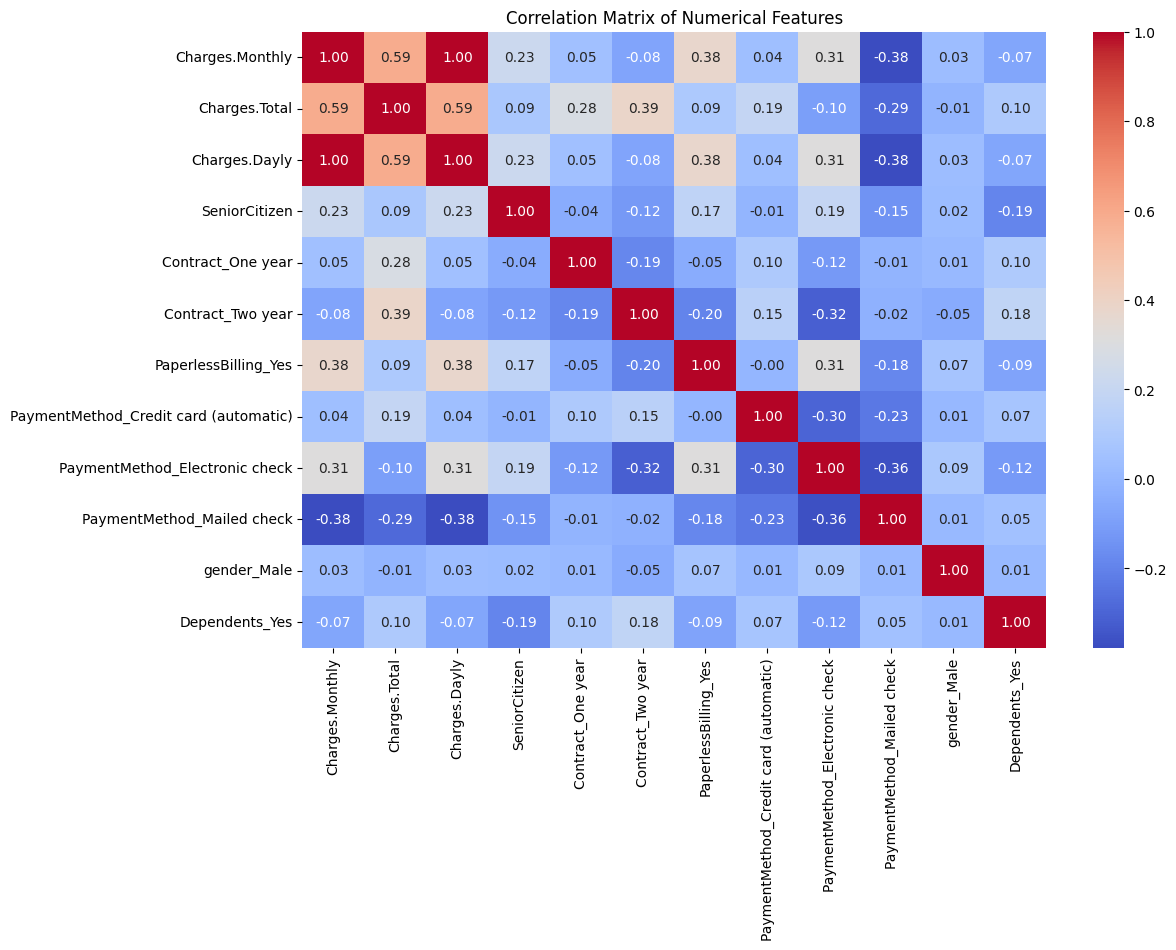

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrix de correlacion
correlation_matrix = X_resampled.corr()

# Mapa calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

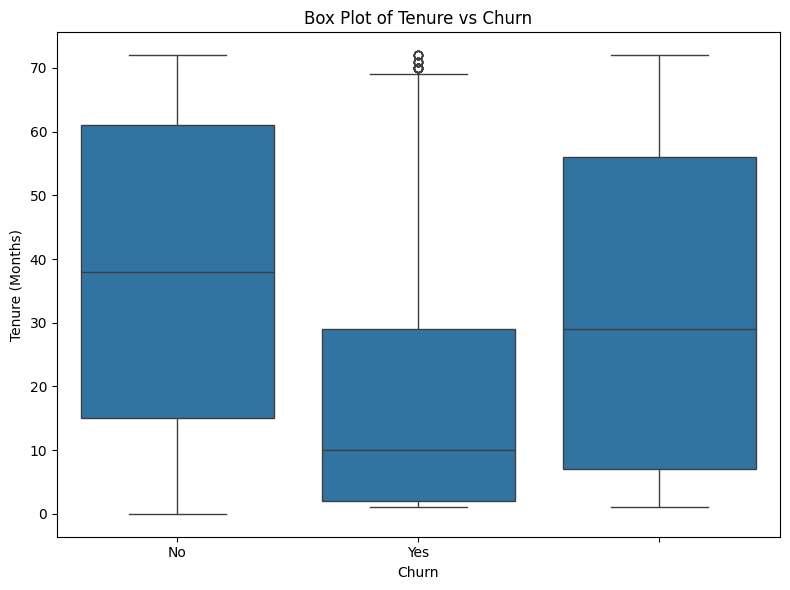

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea box plot de 'tenure' vs 'churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=combined_df)

# Titulos y etiquetas
plt.title('Box Plot of Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')

plt.tight_layout()
plt.show()

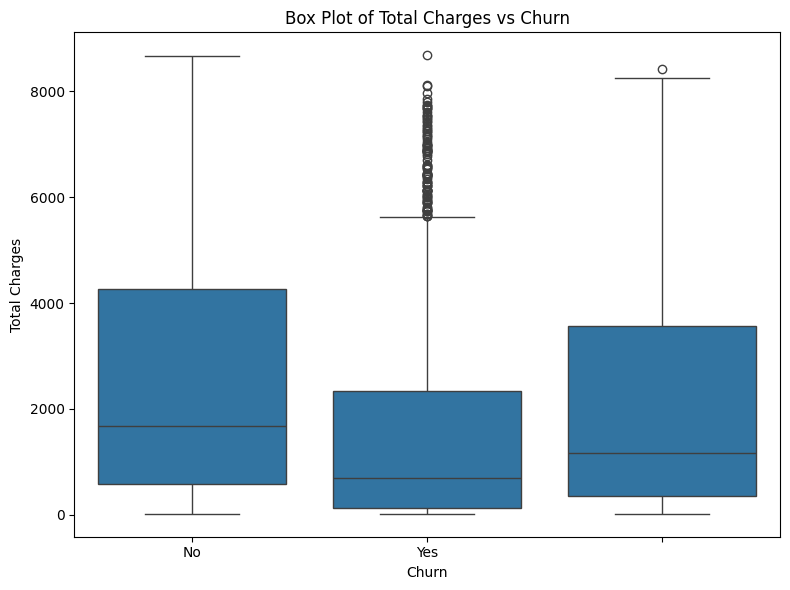

In [51]:
# Crea box plot de  'tenure' vs 'churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='Charges.Total', data=combined_df) # Using combined_df as it contains both columns

# Titulos y etiquetas
plt.title('Box Plot of Total Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

plt.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

# Identifica columnas numericas en X_resampled
# Excluye one-hot encoded y columnas binarias
numerical_cols_resampled = X_resampled.select_dtypes(include=np.number).columns.tolist()

# StandardScaler
scaler = StandardScaler()

# Aplica standarizacion
X_resampled[numerical_cols_resampled] = scaler.fit_transform(X_resampled[numerical_cols_resampled])

display(X_resampled.head())

,Charges.Monthly,Charges.Total,Charges.Dayly,SeniorCitizen,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Dependents_Yes
0,-0.084277,-0.666052,-0.084277,-0.518511,True,False,True,False,False,True,False,True
1,-0.282864,-0.689337,-0.282864,-0.518511,False,False,False,False,False,True,True,False
2,0.204892,-0.808987,0.204892,-0.518511,False,False,True,False,True,False,True,False
3,1.044529,-0.371192,1.044529,2.195317,False,False,True,False,True,False,True,False
4,0.553289,-0.815140,0.553289,2.195317,False,False,True,False,False,True,False,False


In [56]:
from sklearn.model_selection import train_test_split

# Separa los datos para muestreo y pruebas (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7243, 12)
Shape of X_test: (3105, 12)
Shape of y_train: (7243,)
Shape of y_test: (3105,)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# nicia Random Forest Classifier
# Ajuste hyperparameters like n_estimators, max_depth, etc.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entreno del modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


Accuracy: 0.8280

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1553
           1       0.83      0.83      0.83      1552

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105


Confusion Matrix:
[[1281  272]
 [ 262 1290]]


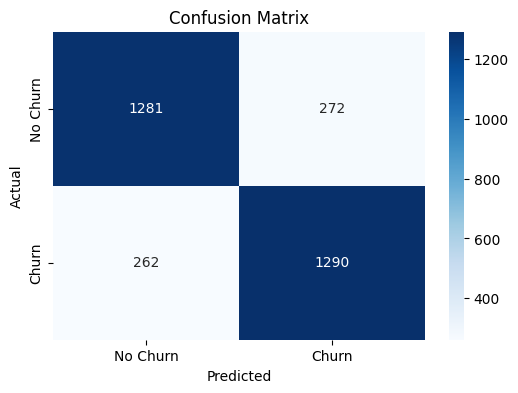

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
# Numeros de neighbors (k) - a common starting point is 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entreno
knn_model.fit(X_train, y_train)

# Prediccion
y_pred_knn = knn_model.predict(X_test)


KNN Model Accuracy: 0.7907

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1553
           1       0.78      0.80      0.79      1552

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105


KNN Model Confusion Matrix:
[[1208  345]
 [ 305 1247]]


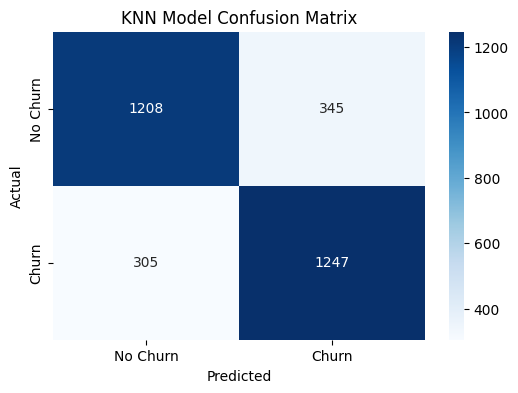

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn:.4f}")

# Classification report
print("\nKNN Model Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Model Confusion Matrix:")
print(conf_matrix_knn)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Model Confusion Matrix')
plt.show()

Conclusiones y recomendaciones finales
Luego de generar un analisis profundo de los datos para el TelecomX y las posibles razones de cancelación de los clientes o identificación temprana de factores que lleven a esta acción tenemos:
- No existen caracteristicas en los clientes que determinen la cancelación o permanencia con el servicio.
- Si hay una relación alta en los contratos de mas duración con las cancelaciones según los datos
- La relación es equivalente con el precio y tiene sentido ya que los contratos mas duraderos son los mas costos, pero se ligan a la cancelación del servicio
La posición de fomentar los contratos cortos, con pocos meses de duración pueden tener mas impacto en la retención de clientes.
Y definitivamente fomentar el medio de pago de cheque electronico, es el medio mas alto de pago.
El modelo propuesto para la predicción de clientes ya sea a cancelar o no, fue el RandomForest, se entreno y generó los siguientes resultados:
Resumen del modelo Random Forest

Accuracy: 0.8280 → ~82.80%

Precision / Recall / F1-score por clase:

Clase 0:

Precision: 0.83

Recall: 0.82

F1-score: 0.83

Clase 1:

Precision: 0.83

Recall: 0.83

F1-score: 0.83

Soporte: 1553 (clase 0), 1552 (clase 1) → clases muy balanceadas

